In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [48]:
#Рассматриваю показательное распределение с параметром k
#К примеру, пусть k = 1.5 , сделаем выборку объёма 1000 как просится в задании и построим гистограмму совместно с pdf
k = 1.5
exp = sts.expon(scale = 1./k)
var = exp.rvs(1000)

In [49]:
x = np.linspace(0,10,1000)

<function matplotlib.pyplot.show>

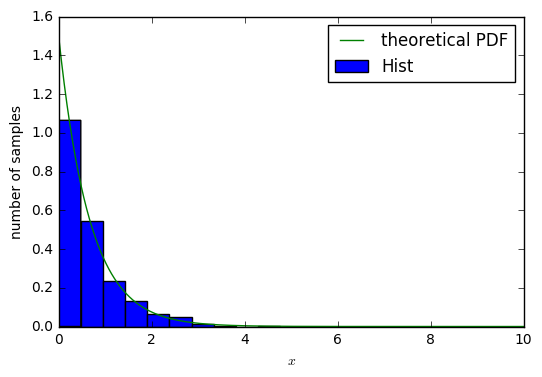

In [50]:
#Далее на графике увидим, что гистограммы выборок и теоретические плотности хорошо друг на друга легли,  что и должно быть
plt.hist(var, normed=True, label = 'Hist')
pdf = exp.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc = 'upper right')
plt.show

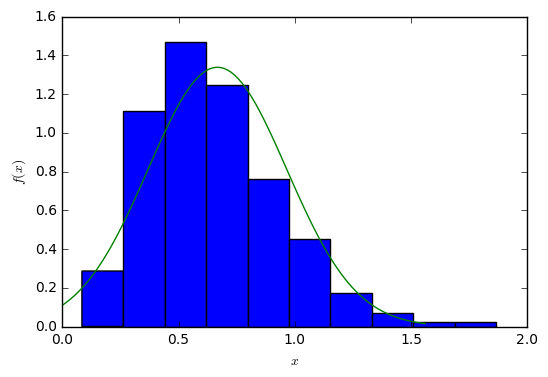

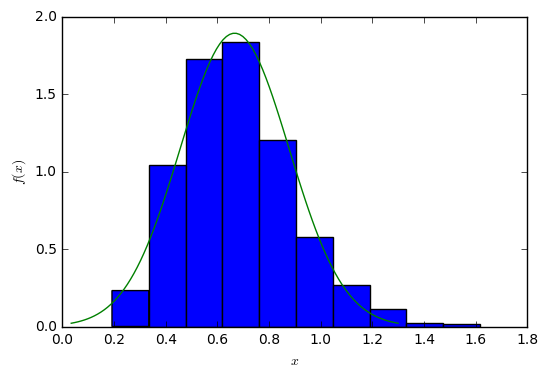

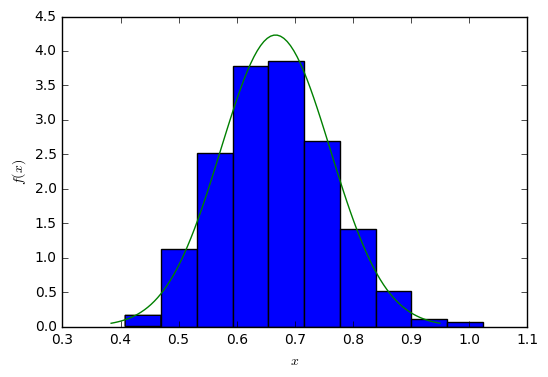

In [51]:
#тут сразу построим гистограммы для различных n вместе с соответствующими нормальными распределениями , попутно вычислив
# их параметры

#по ЦПТ среднее выборочное ведёт себя как N(E(X),D(X)/n)
#в моём случае E(X)=k^{-1} D(X)=k^{-2}

n1 = 5
n2 = 10
n3 = 50

#Параметры нормального распределения
M = k**(-1)
d1 = (k**(-2)/n1)**(0.5)
d2 = (k**(-2)/n2)**(0.5)
d3 = (k**(-2)/n3)**(0.5)

#задаём случайные величины нормального распределения с полученными параметрами
nor1=sts.norm(loc = M, scale = d1)
nor2=sts.norm(loc = M, scale = d2)
nor3=sts.norm(loc = M, scale = d3)

#Воспольуемся правилом трёх сигм, чтобы не растягивалась ось Х; берём левую груницу как максимум,т.к. отрицательная часть неинтересна
x1 = np.linspace(max(M-3*d1,0),M+3*d1,100)
x2 = np.linspace(max(M-3*d2,0),M+3*d2,100)
x3 = np.linspace(max(M-3*d3,0),M+3*d3,100)

npdf1 = nor1.pdf(x1)
npdf2 = nor2.pdf(x2)
npdf3 = nor3.pdf(x3)

#Обсчитываем среднее (тут, конечно, можно было и легче, но что  первое в голову пришло..)
b1 = np.array(range(n1))
a1 = np.array(range(1000),dtype = float)
la = 0
q1 = sts.expon(scale = 1./k)
while la < 1000:
    b1 = q1.rvs(n1)
    a1[la] = sum(b1)/n1
    la += 1

b2 = np.array(range(n2))
a2 = np.array(range(1000),dtype = float)
la = 0
q2 = sts.expon(scale = 1./k)
while la < 1000:
    b2 = q2.rvs(n2)
    a2[la] = sum(b2)/n2
    la += 1    
    
b3 = np.array(range(n3))
a3 = np.array(range(1000),dtype = float)
la = 0
q3 = sts.expon(scale = 1./k)
while la < 1000:
    b3 = q3.rvs(n3)
    a3[la] = sum(b3)/n3
    la += 1
 

#строим графики

plt.hist(a1,bins = 10,normed = True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.plot(x1,npdf1)
plt.show()


plt.hist(a2,bins = 10,normed = True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.plot(x2,npdf2)
plt.show()


plt.hist(a3,bins = 10,normed = True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.plot(x3,npdf3)
plt.show()

Как видно по графикам, ЦПТ достаточно хорошо позволяет оценивать выборочные средние. Заметим, что с ростом n растёт и качество аппроксимации , что и должно быть.